In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d bhaveshmittal/melanoma-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset
License(s): CC0-1.0


In [4]:
!unzip melanoma-cancer-dataset.zip -d melanoma-cancer-dataset/


Streaming output truncated to the last 5000 lines.
  inflating: melanoma-cancer-dataset/train/Malignant/1530.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1531.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1532.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1533.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1534.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1535.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1536.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1537.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1538.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1539.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/154.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1540.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1541.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1542.jpg  
  inflating: melanoma-cancer-dataset/train/Malignant/1

In [5]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [6]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [7]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [34]:
tr_df = train_df('/content/melanoma-cancer-dataset/train')

In [32]:
tr_df

Class Path  Class
0      /content/melanoma-cancer-dataset/train/Benign/...    NaN
1      /content/melanoma-cancer-dataset/train/Benign/...    NaN
2      /content/melanoma-cancer-dataset/train/Benign/...    NaN
3      /content/melanoma-cancer-dataset/train/Benign/...    NaN
4      /content/melanoma-cancer-dataset/train/Benign/...    NaN
...                                                  ...    ...
11874  /content/melanoma-cancer-dataset/train/Maligna...    NaN
11875  /content/melanoma-cancer-dataset/train/Maligna...    NaN
11876  /content/melanoma-cancer-dataset/train/Maligna...    NaN
11877  /content/melanoma-cancer-dataset/train/Maligna...    NaN
11878  /content/melanoma-cancer-dataset/train/Maligna...    NaN

[11879 rows x 2 columns]

In [35]:
ts_df = test_df('/content/melanoma-cancer-dataset/test')

In [36]:
ts_df

Class Path      Class
0     /content/melanoma-cancer-dataset/test/Benign/7...     Benign
1     /content/melanoma-cancer-dataset/test/Benign/7...     Benign
2     /content/melanoma-cancer-dataset/test/Benign/6...     Benign
3     /content/melanoma-cancer-dataset/test/Benign/6...     Benign
4     /content/melanoma-cancer-dataset/test/Benign/6...     Benign
...                                                 ...        ...
1995  /content/melanoma-cancer-dataset/test/Malignan...  Malignant
1996  /content/melanoma-cancer-dataset/test/Malignan...  Malignant
1997  /content/melanoma-cancer-dataset/test/Malignan...  Malignant
1998  /content/melanoma-cancer-dataset/test/Malignan...  Malignant
1999  /content/melanoma-cancer-dataset/test/Malignan...  Malignant

[2000 rows x 2 columns]

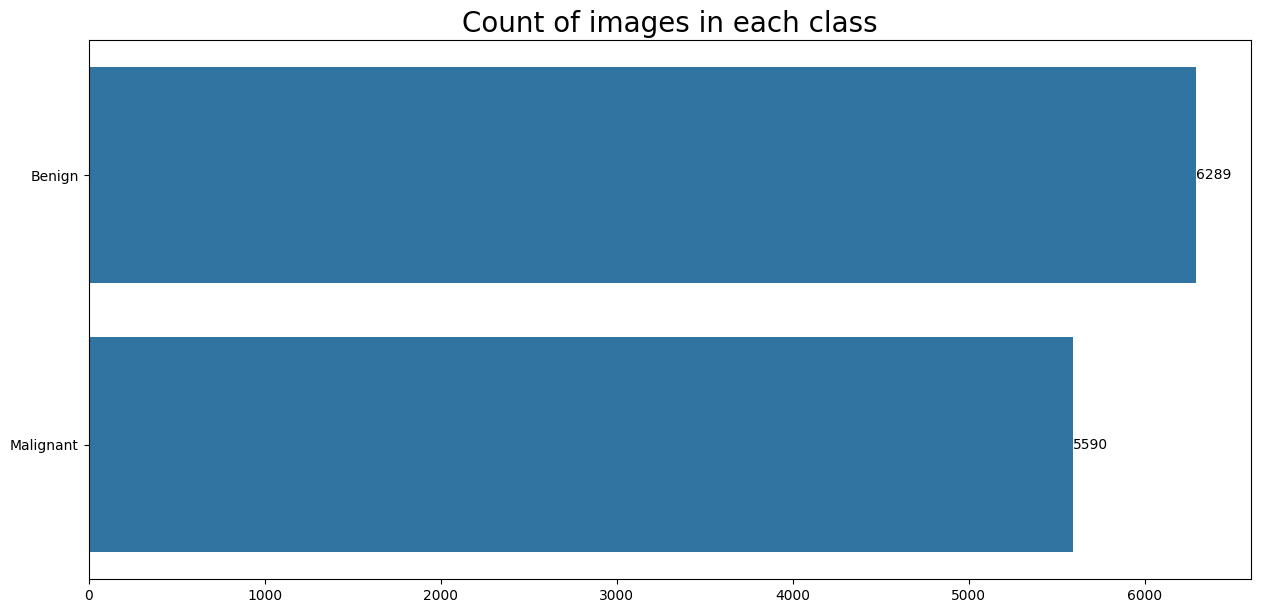

In [37]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

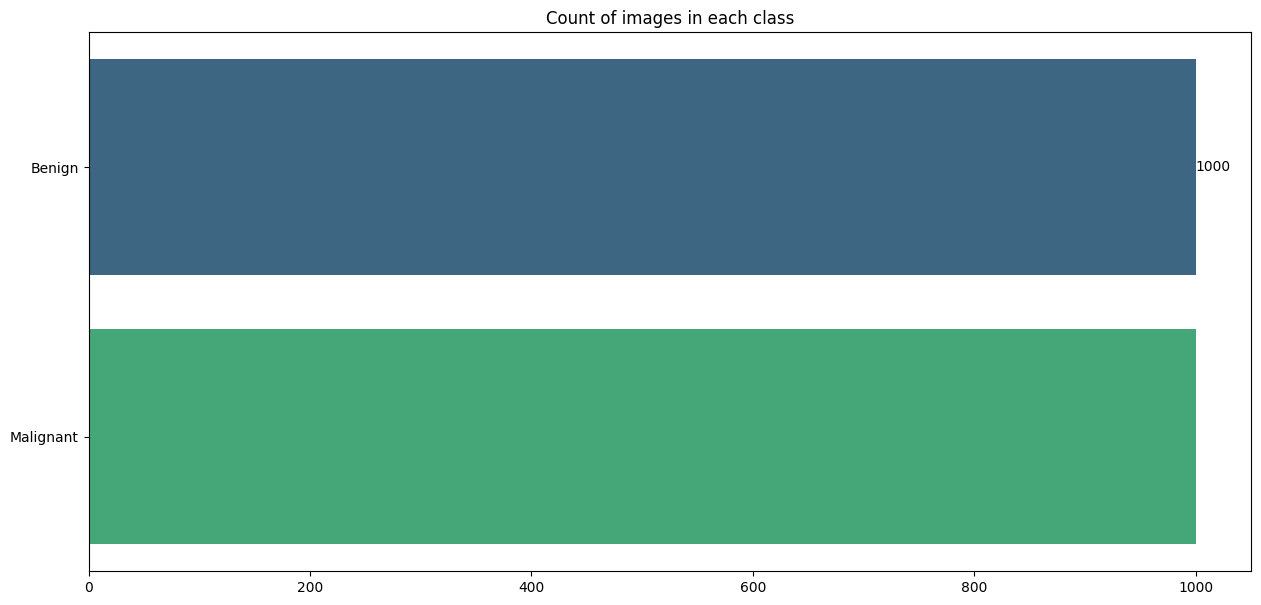

In [38]:
#Count each class in test data
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

# **SPLIT DATA INTO TRAIN,TEST,VALID**

In [15]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [16]:
valid_df

Class Path      Class
1297  /content/melanoma-cancer-dataset/test/Malignan...  Malignant
1012  /content/melanoma-cancer-dataset/test/Malignan...  Malignant
1319  /content/melanoma-cancer-dataset/test/Malignan...  Malignant
237   /content/melanoma-cancer-dataset/test/Benign/7...     Benign
1930  /content/melanoma-cancer-dataset/test/Malignan...  Malignant
...                                                 ...        ...
711   /content/melanoma-cancer-dataset/test/Benign/7...     Benign
1642  /content/melanoma-cancer-dataset/test/Malignan...  Malignant
412   /content/melanoma-cancer-dataset/test/Benign/7...     Benign
1506  /content/melanoma-cancer-dataset/test/Malignan...  Malignant
479   /content/melanoma-cancer-dataset/test/Benign/6...     Benign

[1000 rows x 2 columns]

In [39]:
tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size,
                                  class_mode='binary')  # Change to 'binary'

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size,
                                     class_mode='binary')  # Change to 'binary'

ts_gen = _gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False,
                                  class_mode='binary')  # Change to 'binary'


Found 11879 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


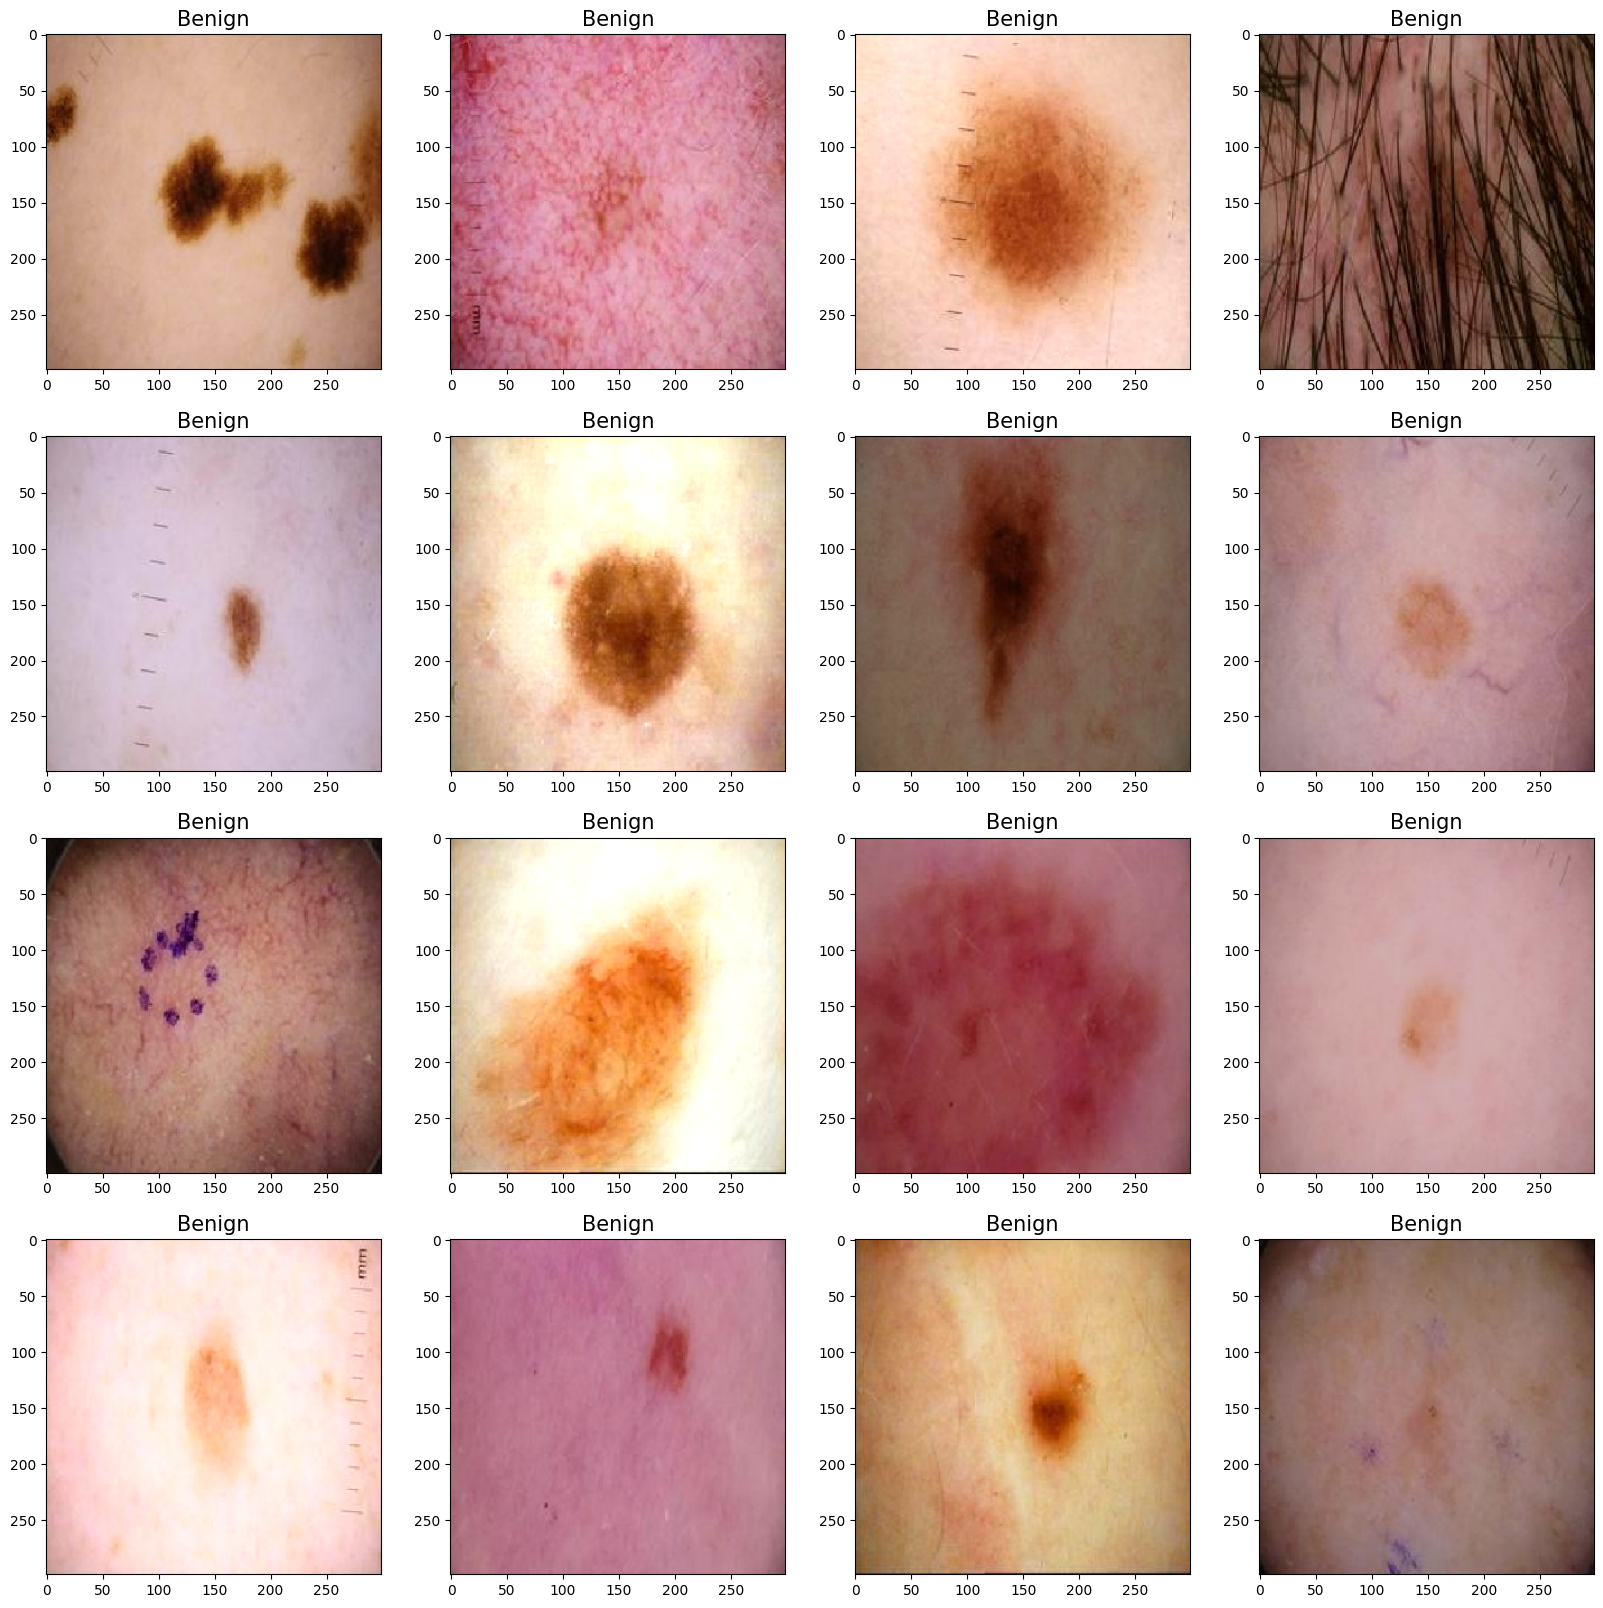

In [40]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall, AUC
img_shape = (299, 299, 3)

# Load pre-trained Xception model
base_model = tf.keras.applications.Xception(
    include_top=False, weights="imagenet", input_shape=img_shape, pooling='max'
)

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')  # Change from 4 to 1 neuron with sigmoid
])

# Compile the model
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='binary_crossentropy',  # Change from categorical_crossentropy
    metrics=['accuracy', Precision(), Recall(), AUC()]
)

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,123,881 (80.58 MB)

 Trainable params: 21,069,353 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

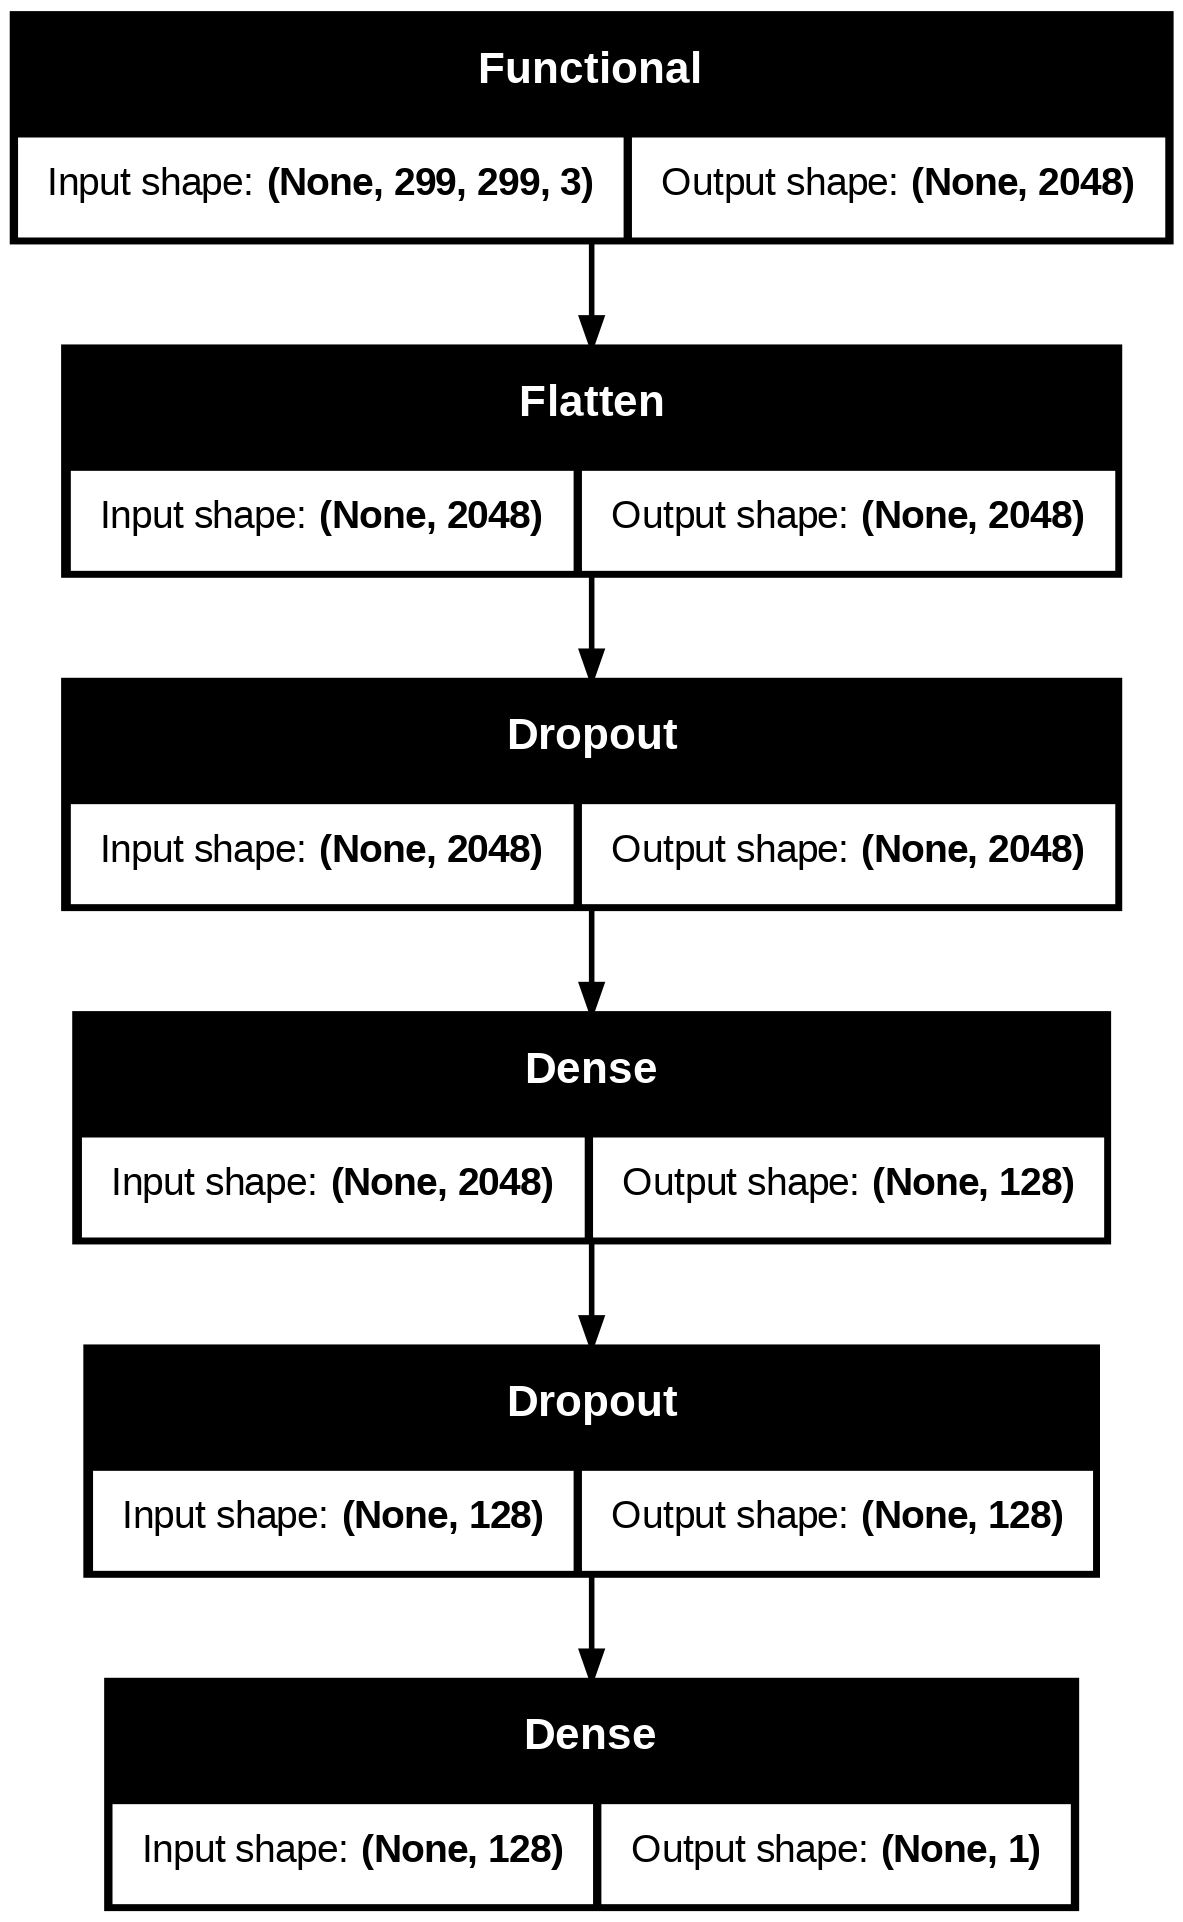

In [46]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [47]:
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 448s 1s/step - accuracy: 0.8482 - auc: 0.9093 - loss: 0.4085 - precision_6: 0.8412 - recall_6: 0.8332 - val_accuracy: 0.9140 - val_auc: 0.9722 - val_loss: 0.2149 - val_precision_6: 0.9312 - val_recall_6: 0.8940
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 348s 934ms/step - accuracy: 0.9274 - auc: 0.9818 - loss: 0.1739 - precision_6: 0.9264 - recall_6: 0.9193 - val_accuracy: 0.9320 - val_auc: 0.9758 - val_loss: 0.2029 - val_precision_6: 0.9235 - val_recall_6: 0.9420
Epoch 3/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 346s 929ms/step - accuracy: 0.9594 - auc: 0.9927 - loss: 0.1054 - precision_6: 0.9632 - recall_6: 0.9512 - val_accuracy: 0.9200 - val_auc: 0.9835 - val_loss: 0.2355 - val_precision_6: 0.9839 - val_recall_6: 0.8540
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 345s 928ms/step - accuracy: 0.9770 - auc: 0.9968 - loss: 0.0651 - precision_6: 0.9805 - recall_6: 0.9711 - val_accuracy: 0.9520 - val_auc: 0.9867 - val_loss: 0.1518 - val_precision_6: 0.9466 - val_reca

In [48]:
hist.history.keys()

dict_keys(['accuracy', 'auc', 'loss', 'precision_6', 'recall_6', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision_6', 'val_recall_6'])

In [49]:
model.save('skin_cancer_final.h5')

In [53]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

372/372 ━━━━━━━━━━━━━━━━━━━━ 108s 290ms/step - accuracy: 0.9980 - auc: 0.9999 - loss: 0.0063 - precision_6: 0.9985 - recall_6: 0.9972
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 277ms/step - accuracy: 0.9541 - auc: 0.9845 - loss: 0.1996 - precision_6: 0.9668 - recall_6: 0.9414
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 148ms/step - accuracy: 0.9551 - auc: 0.4992 - loss: 0.1830 - precision_6: 0.4332 - recall_6: 0.4886
Train Loss: 0.0076
Train Accuracy: 99.77%
--------------------
Validation Loss: 0.2066
Validation Accuracy: 95.70%
--------------------
Test Loss: 0.1936
Test Accuracy: 95.60%


125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step


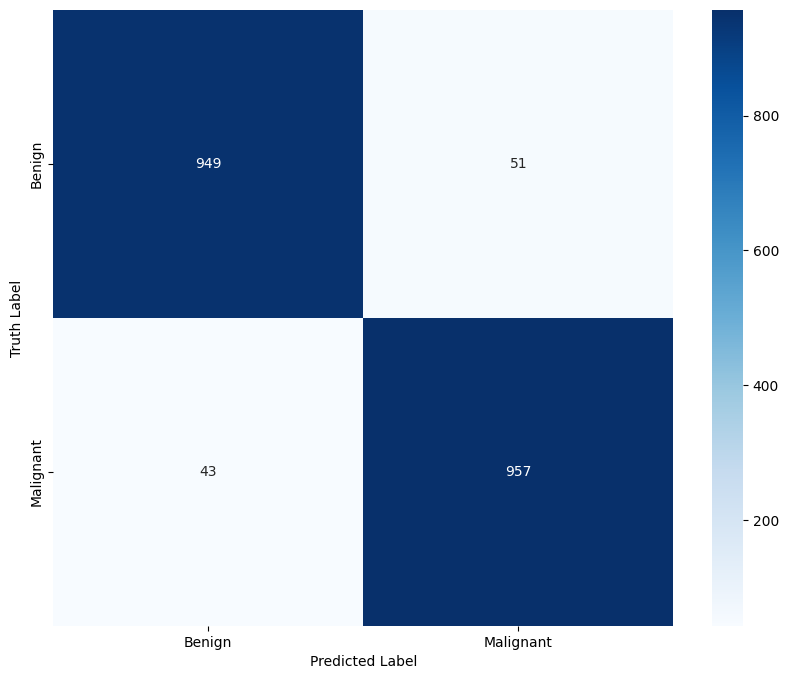

In [55]:
y_pred = model.predict(ts_gen)
y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions (0 or 1)

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [62]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image

    class_dict = {0: "Benign", 1: "Malignant"}  # Ensure correct mapping

    # Load and preprocess the image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img)[0][0]  # Single probability output

    # Convert probability to class label
    label = "Malignant" if prediction >= 0.5 else "Benign"
    confidence = prediction * 100 if prediction >= 0.5 else (1 - prediction) * 100

    # Plot image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(resized_img)
    plt.title(f"Prediction: {label} ({confidence:.2f}%)", fontsize=14, color='red' if label == "Malignant" else 'green')
    plt.axis("off")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


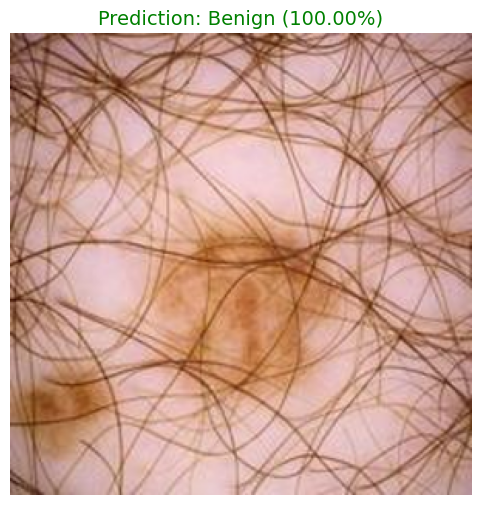

In [63]:
predict('/content/melanoma-cancer-dataset/test/Benign/6329.jpg')

In [ ]:
predict('/content/melanoma-cancer-dataset/test/Benign/6310.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


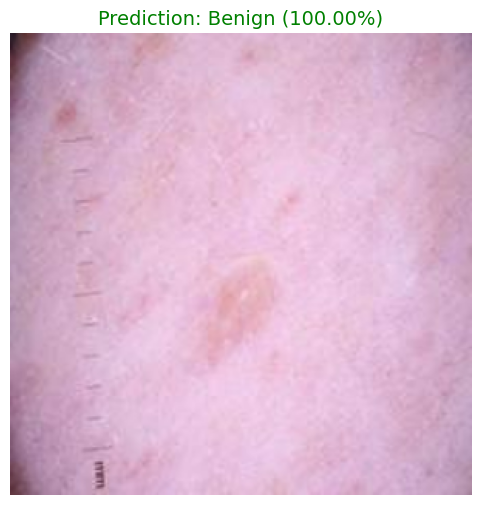

In [71]:
predict('/content/melanoma-cancer-dataset/test/Benign/6372.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


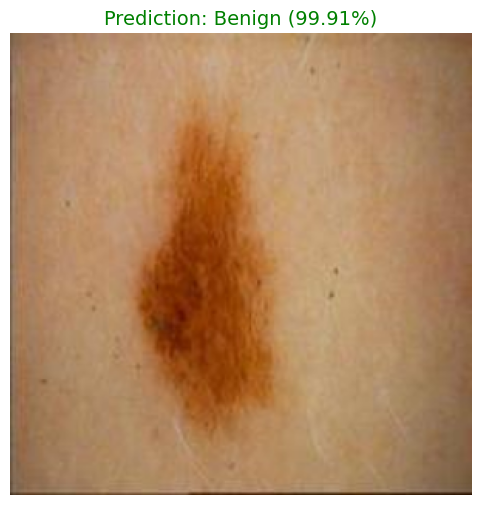

In [72]:
predict('/content/melanoma-cancer-dataset/test/Benign/6389.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


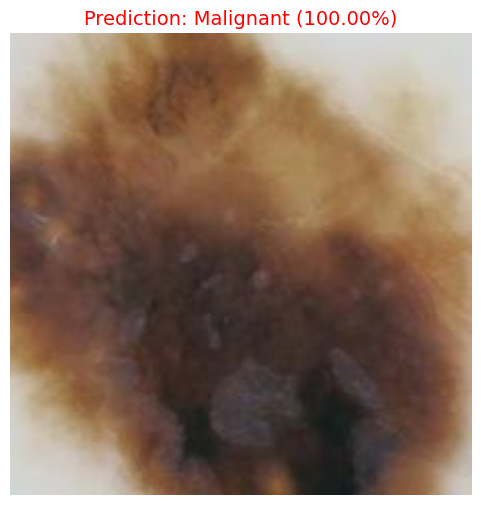

In [65]:
predict('/content/melanoma-cancer-dataset/test/Malignant/5647.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


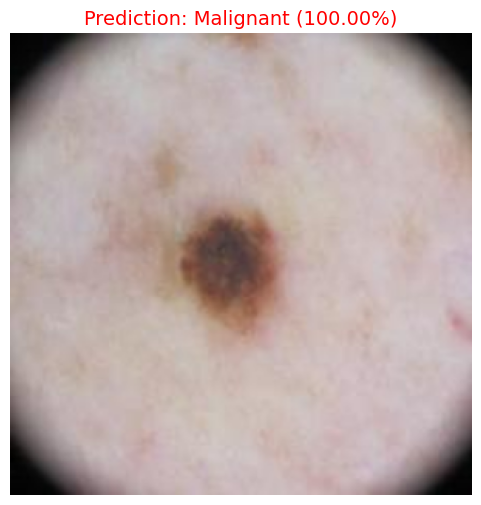

In [66]:
predict('/content/melanoma-cancer-dataset/test/Malignant/5669.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


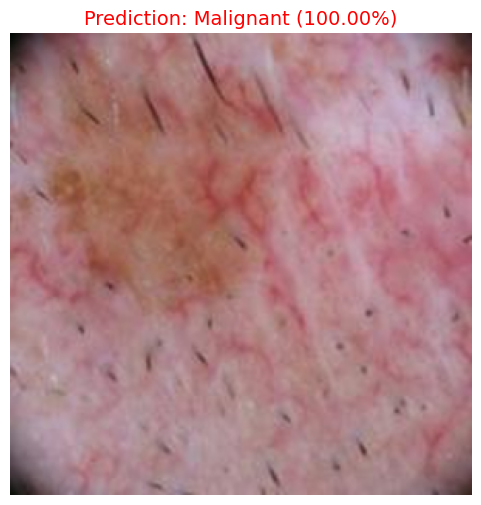

In [67]:
predict('/content/melanoma-cancer-dataset/test/Malignant/5681.jpg')